In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load("./data/barrier_sdf.npz")
sdf = data['sdf'].squeeze()
gradient = data['sdf_gradient'].squeeze()
N = gradient.shape[0]


In [4]:
zeros_sdf = np.zeros_like(sdf)

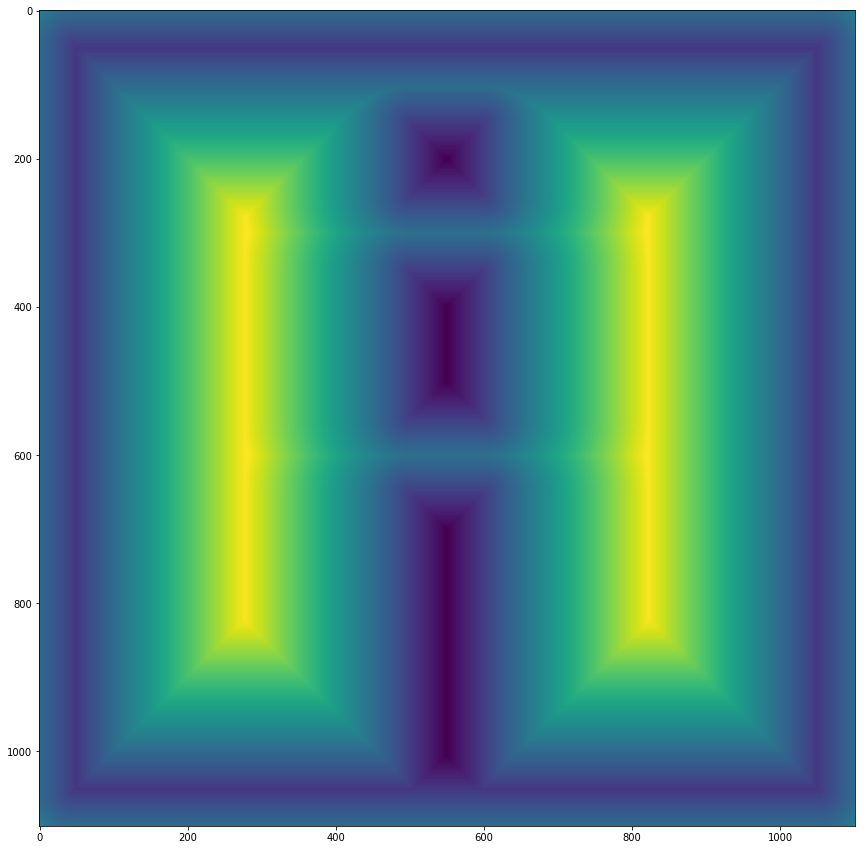

In [5]:
plt.figure(figsize=(15,15))
# imshow expects rows then cols, but we have cols then rows so first we transpose
# then we flipud because matplotlib assumes the origin is top left
plt.imshow(np.flipud(sdf.T))

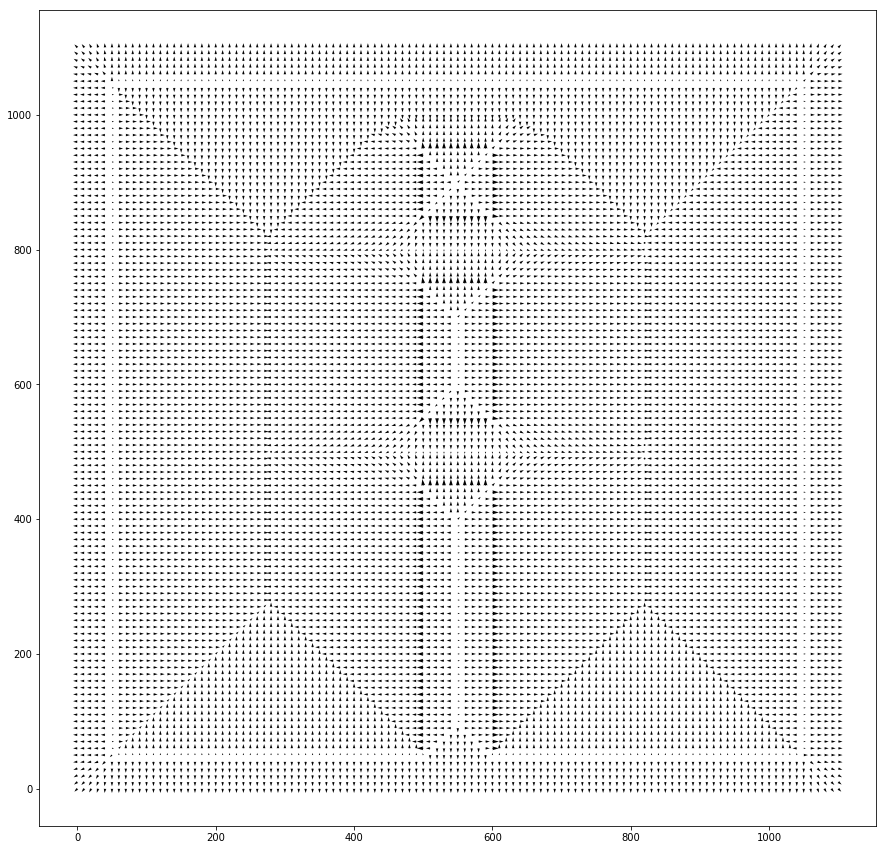

In [14]:
def plot_grad(other_points=None):
    spacing = 10
    startx = 0
    endx = N
    starty = 0
    endy =N
    tx = np.arange(startx, endx, spacing)
    ty = np.arange(starty, endy, spacing)
    plt.figure(figsize=(15,15))
    # no flip up/down needed here because this isn't an image
    X, Y = np.mgrid[startx:endx:spacing, starty:endy:spacing]
    positions = np.vstack([X.ravel(), Y.ravel()])
    plt.quiver(positions[0], positions[1], gradient[startx:endx:spacing,starty:endy:spacing,0].flatten(), gradient[startx:endx:spacing,starty:endy:spacing,1].flatten())
    if other_points is not None:
        other_points = np.array(other_points)
        plt.plot(other_points[:,0], other_points[:,1])
        plt.scatter(other_points[:,0], other_points[:,1], s=10)
plot_grad() 

# Let's try to do gradient descent on the SDF

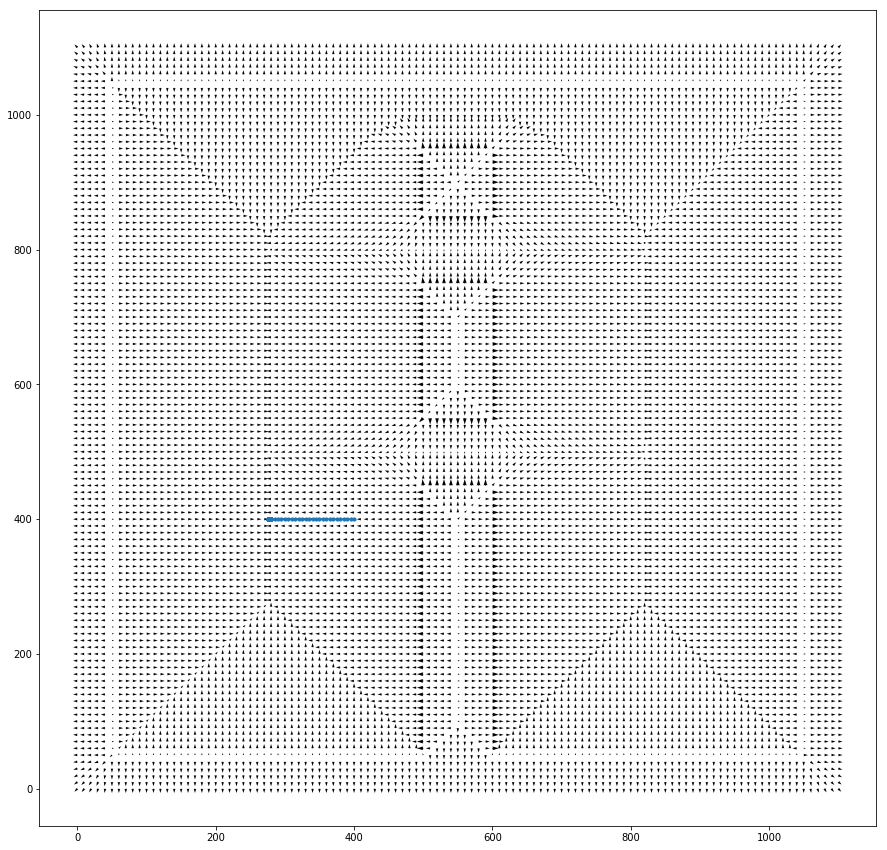

In [7]:
initial_point = np.array([400,400])
points = [initial_point]
point = initial_point
lr = 5
for i in range(100):
    point = point + lr * gradient[int(point[0]), int(point[1])]
    points.append(point)
    
plot_grad(points)